## Bài toán dự đoán giá nhà
- Đưa vào các thuộc tính căn nhà dự đoán giá (price)

### Bài tập
- Tiền xử lý dữ liệu cho trước: dữ liệu dự đoán giá nhà (xem thêm tại https://www.kaggle.com/harlfoxem/housesalesprediction)
- Xây dựng và đánh giá các mô hình KNN, Random Forest, Linear Regression, Ridge, Lasso
- Lựa chọn các siêu tham số cho từng mô hình
- So sánh các mô hình với nhau

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

In [52]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [53]:
dataset = pd.read_csv('kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [55]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
dataset.date.value_counts()

date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: count, Length: 372, dtype: int64

In [57]:
X_data = dataset.drop(['price', 'id', 'date'], axis = 1)
y_data = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42)

In [58]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, 
                                                  X_train, y_train, 
                                                  cv=5, 
                                                  n_jobs=-1, 
                                                  train_sizes=[1.0, ], 
                                                  scoring='neg_mean_squared_error')
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "mean_squared_error"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=7.88261e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.29111e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.19544e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.08943e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrit

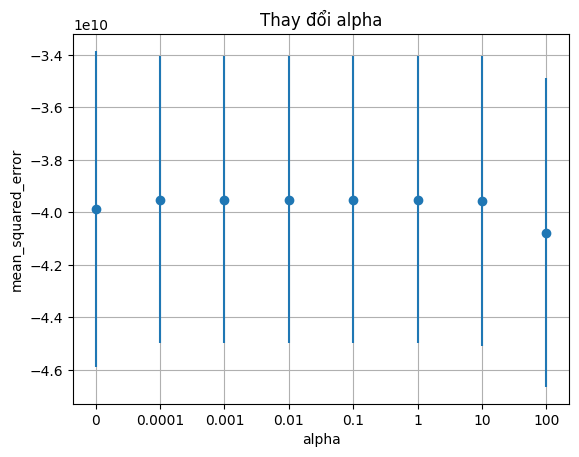

In [59]:
title = 'Thay đổi alpha'
x_label = 'alpha'
X = []
y = []
error = []

for a in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    model = Ridge(alpha=a)
    mean, std = cross_validation(model)
    X.append(str(a))
    y.append(mean)
    error.append(std)

plot(title, x_label, X,y, error)
plt.show()

/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

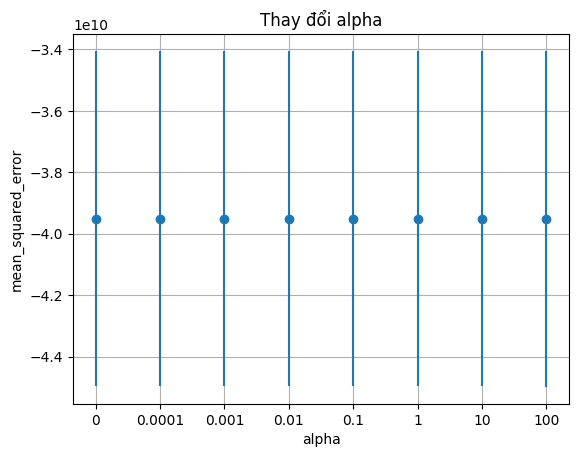

In [60]:
title = 'Thay đổi alpha'
x_label = 'alpha'
X = []
y = []
error = []

for a in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    model = Lasso(alpha=a)
    mean, std = cross_validation(model)
    X.append(str(a))
    y.append(mean)
    error.append(std)

plot(title, x_label, X, y, error)
plt.show()

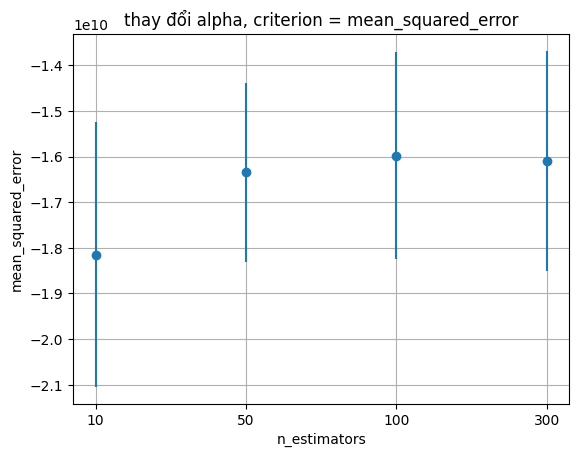

In [61]:
title = "thay đổi alpha, criterion = mean_squared_error"
xlabel = "n_estimators"
X = []
y = []
error = []

for n_estimators in [10, 50, 100, 300]:
    text_clf = RandomForestRegressor(criterion='squared_error', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf)
    X.append(str(n_estimators))
    y.append(mean)
    error.append(std)

plot(title, xlabel, X, y, error)
plt.show()

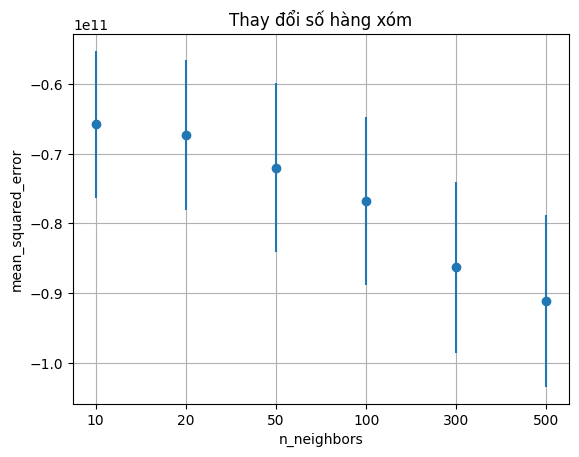

In [62]:
title = 'Thay đổi số hàng xóm'
xlabel = "n_neighbors"
X=[]
y=[]
error=[]

for n in [10, 20, 50, 100, 300, 500]:
    model = KNeighborsRegressor(n_neighbors=n)
    mean, std = cross_validation(model)
    X.append(str(n))
    y.append(mean)
    error.append(std)

plot(title, xlabel, X, y, error)
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(criterion='squared_error', n_estimators=300)
knn = KNeighborsRegressor(n_neighbors=10)
lrg = LinearRegression()
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=100)

rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
lrg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print(f'RF: {mean_squared_error(y_test, rf.predict(X_test))}')
print(f'KNN: {mean_squared_error(y_test, knn.predict(X_test))}')
print(f'Linear Regression: {mean_squared_error(y_test, lrg.predict(X_test))}')
print(f'Ridge: {mean_squared_error(y_test, ridge.predict(X_test))}')
print(f'Lasoo: {mean_squared_error(y_test, lasso.predict(X_test))}')

/Users/admin/Downloads/CTAI-ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.906e+14, tolerance: 2.104e+11
  model = cd_fast.enet_coordinate_descent(


RF: 20132174798.892677
KNN: 73050274654.15308
Linear Regression: 44151294752.41102
Ridge: 44293094815.95292
Lasoo: 44202193621.380196
